/home/onuraydemir/miniconda3/envs/remenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


importing Jupyter notebook from Dataset.ipynb


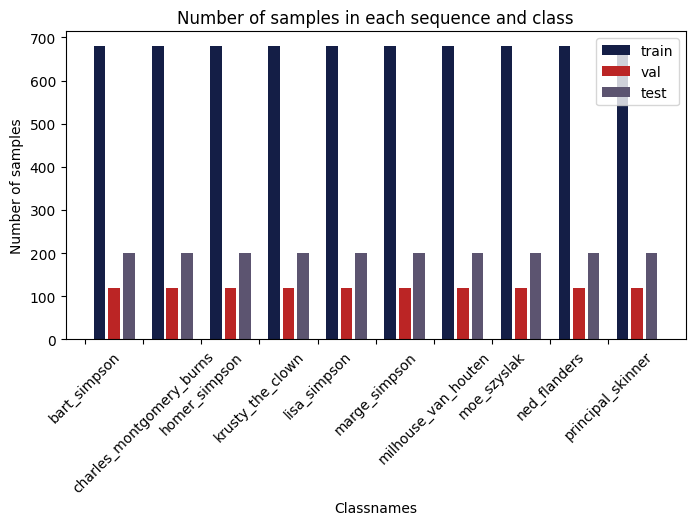

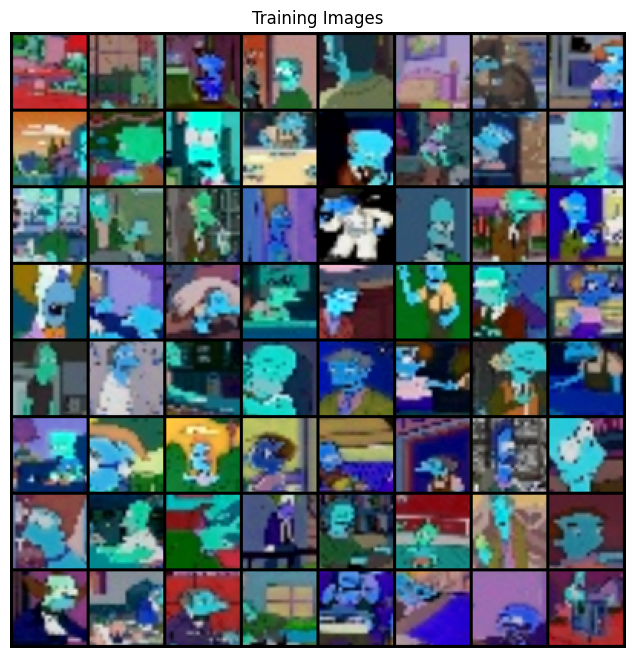

In [1]:
import lightning as L
from torch.utils.data import DataLoader

import import_ipynb
import Dataset


In [4]:
class DataModule(L.LightningDataModule):
    def __init__(self, data_dir="/home/onuraydemir/Desktop/Datasets/SimpsonMnist", batch_size=64):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

    def prepare_data(self):
        # download data & operations (preprocess)
        pass

    def setup(self, stage):
        # Popularly, train & val & test splitting operations etc.
        self.train_dataset = Dataset.SimpsonsMnistDataset(sequence="train")
        self.val_dataset = Dataset.SimpsonsMnistDataset(sequence="val")
        self.test_dataset = Dataset.SimpsonsMnistDataset(sequence="test")

    def train_dataloader(self):
        train_loader = DataLoader(dataset=self.train_dataset,
                                 batch_size=self.batch_size,
                                 shuffle=True,
                                 drop_last=True)
        return train_loader

    def val_dataloader(self):
        val_loader = DataLoader(dataset=self.val_dataset,
                                 batch_size=self.batch_size,
                                 shuffle=False)
        return val_loader

    def test_dataloader(self):
        test_loader = DataLoader(dataset=self.test_dataset,
                                 batch_size=self.batch_size,
                                 shuffle=False)
        return test_loader
        